In [ ]:
import tensorflow as tf
import numpy as np

x_input = np.array([[1,2,3,4,5]])
y_input = np.array([[10]])

x = tf.placeholder(tf.float32, [None, 5])
y = tf.placeholder(tf.float32, [None, 1])

print(x_input)
print(y_input)
print(x)
print(y)

In [ ]:
W = tf.Variable(tf.zeros([5, 1]))
b = tf.Variable(tf.zeros([1]))
y_pred = tf.matmul(x, W)+b

print(W)
print(b)

In [ ]:
# define a loss function
loss = tf.reduce_sum(tf.pow((y-y_pred), 2))

#specify the optimizer and the variable that we want to minimize
train = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

# initialize all variables
init = tf.global_variables_initializer()

In [ ]:

sess = tf.Session()
sess.run(init)
for i in range(10):
    feed_dict = {x: x_input, y: y_input}
    _, loss_value = sess.run([train, loss], feed_dict=feed_dict)
    print(loss_value)


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import numpy as np
x_input = np.array([[1,2,3,4,5]])
y_input = np.array([[10]])



In [ ]:
model = Sequential()
model.add(Dense(units=32, input_dim=x_input.shape[1]))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

model.summary()


In [ ]:
history = model.fit(x_input, y_input, epochs=10, batch_size=32)

In [ ]:
pred = model.predict(x_input, batch_size=128)


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using the Iris Plants Database
from sklearn.datasets import load_iris

In [37]:
# The first two classes (Iris-Setosa and Iris-Versicolour) are linear separable
iris = load_iris()
idxs = np.where(iris.target<2)
X = iris.data[idxs]
Y = iris.target[idxs]


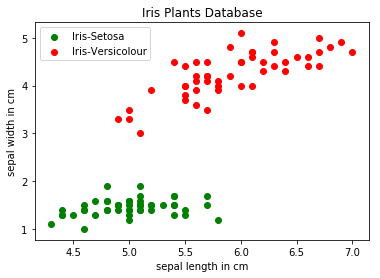

In [38]:
plt.scatter(X[Y==0][:,0],X[Y==0][:,2], color='green', label='Iris-Setosa')
plt.scatter(X[Y==1][:,0],X[Y==1][:,2], color='red', label='Iris-Versicolour')
plt.title('Iris Plants Database')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.legend()
plt.show()

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
weights = np.random.normal(size=X_train.shape[1])
bias = 1

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(80, 4)
(20, 4)
(80,)
(20,)


In [40]:
#define the hyperparameters
learning_rate = 0.1
n_epochs = 15


del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []
for i in range(n_epochs):
    # We apply a simple step function, if the output is > 0.5 we predict 1, else 0
    output = np.where((X_train.dot(weights)+bias)>0.5, 1, 0)
    
    # Compute MSE
    error = np.mean((y_train-output)**2)
 
    # Update weights and bias
    weights -= learning_rate * np.dot((output-y_train), X_train)
    bias += learning_rate * np.sum(np.dot((output-y_train), X_train))
    
    # Calculate MSE
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)
    
    # Determine validation accuracy
    output_val = np.where(X_val.dot(weights)>0.5, 1, 0)
    accuracy = np.mean(np.where(y_val==output_val, 1, 0))
    hist_accuracy.append(accuracy)

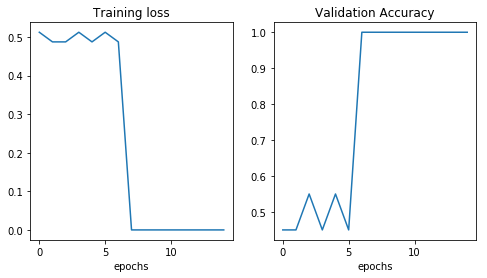

In [41]:
fig = plt.figure(figsize=(8, 4))

a = fig.add_subplot(1,2,1)
imgplot = plt.plot(hist_loss)
plt.xlabel('epochs')
a.set_title('Training loss')


a=fig.add_subplot(1,2,2)
imgplot = plt.plot(hist_accuracy)
plt.xlabel('epochs')
a.set_title('Validation Accuracy')
plt.show()


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using make_circles from scikit-learn
from sklearn.datasets import make_circles


In [70]:
# We create an inner and outer circle
X, y = make_circles(n_samples=500, factor=.3, noise=.05, random_state=2017)
outer = y == 0
inner = y == 1


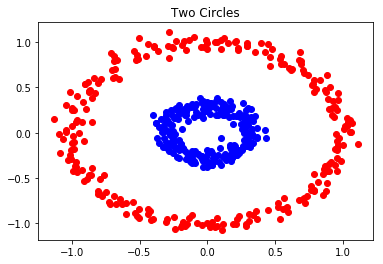

In [71]:
plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()

In [72]:
# We normalize the data to make sure the center of both circles is (1,1):
X = X+1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# A linear activation function won't work in this case, so we'll be using a sigmoid function:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# hyperparameters:
n_hidden = 50 # number of hidden units
n_epochs = 1000
learning_rate = 1


In [73]:
# Initialize the weights and other variables:

weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []

In [75]:
for e in range(n_epochs):
    
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)
    
    # Loop through training data in batches of 1
    for x_, y_ in zip(X_train, y_train):
        
        # Forward computations
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))
        
        # Backward computations
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]
        
        # Update weights
        weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
        weights_output += learning_rate * del_w_output / X_train.shape[0]
        
    # Print stats (validation loss and accuracy)
    if e % 100 == 0:
        hidden_output = sigmoid(np.dot(X_val, weights_hidden))
        out = sigmoid(np.dot(hidden_output, weights_output))
        loss = np.mean((out - y_val) ** 2)
        # Final prediction is based on a threshold of 0.5
        predictions = out > 0.5
        accuracy = np.mean(predictions == y_val)
        print("Epoch: ", '{:>4}'.format(e),"; Validation loss: ", '{:>6}'.format(loss.round(4)), "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

Epoch:     0 ; Validation loss:  0.0025 ; Validation accuracy:     1.0
Epoch:   100 ; Validation loss:  0.0023 ; Validation accuracy:     1.0
Epoch:   200 ; Validation loss:  0.0025 ; Validation accuracy:     1.0
Epoch:   300 ; Validation loss:  0.0027 ; Validation accuracy:     1.0
Epoch:   400 ; Validation loss:  0.0028 ; Validation accuracy:     1.0
Epoch:   500 ; Validation loss:   0.003 ; Validation accuracy:     1.0
Epoch:   600 ; Validation loss:  0.0031 ; Validation accuracy:     1.0
Epoch:   700 ; Validation loss:  0.0023 ; Validation accuracy:     1.0
Epoch:   800 ; Validation loss:  0.0037 ; Validation accuracy:     1.0
Epoch:   900 ; Validation loss:  0.0038 ; Validation accuracy:     1.0


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [109]:
data = pd.read_csv('winequality-red.csv', sep=';')
y = data['quality']
X = data.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [111]:
print('Average quality training set: {:.4f}'.format(y_train.mean()))
X_train.head()

Average quality training set: 5.6364


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1067,11.1,0.310,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
1511,7.1,0.690,0.04,2.1,0.068,19.0,27.0,0.99712,3.44,0.67,9.8
236,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0
178,7.0,0.805,0.00,2.5,0.068,7.0,20.0,0.99690,3.48,0.56,9.6
700,10.6,1.020,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1


In [113]:
# normalize the input data:
scalar = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scalar.transform(X_train))
X_test = pd.DataFrame(scalar.transform(X_test))


In [120]:
# Predict the mean quality of the training data for each validation input
print('MSE:', np.mean((y_test - ([y_train.mean()] * y_test.shape[0]))))

MSE: -0.0020597146207975924


In [123]:
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])

# callback for early stopping and saving the best model:
callbacks= [EarlyStopping(monitor='val_acc', patience=20, verbose=1),
            ModelCheckpoint('checkpoints/multi_layer_best_mode')]

In [125]:
batch_size=64
n_epochs=5000
model.fit(X_train.values, y_train, batch_size=batch_size, 
          epochs=n_epochs, verbose=2, callbacks=callbacks)

Epoch 1/5000
 - 0s - loss: 6.8526 - acc: 0.0805
Epoch 2/5000
 - 0s - loss: 3.2455 - acc: 0.2338


C:\Users\swillin\anaconda3\lib\site-packages\keras\callbacks.py:493: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 3/5000
 - 0s - loss: 2.3511 - acc: 0.2471
Epoch 4/5000
 - 0s - loss: 2.0456 - acc: 0.2854
Epoch 5/5000
 - 0s - loss: 1.8447 - acc: 0.2885
Epoch 6/5000
 - 0s - loss: 1.6734 - acc: 0.2995
Epoch 7/5000
 - 0s - loss: 1.5301 - acc: 0.3049
Epoch 8/5000
 - 0s - loss: 1.4083 - acc: 0.3229
Epoch 9/5000
 - 0s - loss: 1.2996 - acc: 0.3425
Epoch 10/5000
 - 0s - loss: 1.2018 - acc: 0.3487
Epoch 11/5000
 - 0s - loss: 1.1095 - acc: 0.3776
Epoch 12/5000
 - 0s - loss: 1.0328 - acc: 0.3847
Epoch 13/5000
 - 0s - loss: 0.9627 - acc: 0.3941
Epoch 14/5000
 - 0s - loss: 0.8907 - acc: 0.4066
Epoch 15/5000
 - 0s - loss: 0.8265 - acc: 0.4300
Epoch 16/5000
 - 0s - loss: 0.7803 - acc: 0.4363
Epoch 17/5000
 - 0s - loss: 0.7183 - acc: 0.4519
Epoch 18/5000
 - 0s - loss: 0.6795 - acc: 0.4676
Epoch 19/5000
 - 0s - loss: 0.6417 - acc: 0.4840
Epoch 20/5000
 - 0s - loss: 0.6062 - acc: 0.4887
Epoch 21/5000
 - 0s - loss: 0.5728 - acc: 0.5027
Epoch 22/5000
 - 0s - loss: 0.5411 - acc: 0.5231
Epoch 23/5000
 - 0s - loss:

Epoch 169/5000
 - 0s - loss: 0.1792 - acc: 0.7866
Epoch 170/5000
 - 0s - loss: 0.1820 - acc: 0.7756
Epoch 171/5000
 - 0s - loss: 0.1734 - acc: 0.7897
Epoch 172/5000
 - 0s - loss: 0.1747 - acc: 0.7889
Epoch 173/5000
 - 0s - loss: 0.1722 - acc: 0.7967
Epoch 174/5000
 - 0s - loss: 0.1719 - acc: 0.7920
Epoch 175/5000
 - 0s - loss: 0.1695 - acc: 0.8045
Epoch 176/5000
 - 0s - loss: 0.1707 - acc: 0.7928
Epoch 177/5000
 - 0s - loss: 0.1754 - acc: 0.7889
Epoch 178/5000
 - 0s - loss: 0.1688 - acc: 0.8038
Epoch 179/5000
 - 0s - loss: 0.1722 - acc: 0.7912
Epoch 180/5000
 - 0s - loss: 0.1693 - acc: 0.7920
Epoch 181/5000
 - 0s - loss: 0.1703 - acc: 0.8053
Epoch 182/5000
 - 0s - loss: 0.1632 - acc: 0.8038
Epoch 183/5000
 - 0s - loss: 0.1639 - acc: 0.8053
Epoch 184/5000
 - 0s - loss: 0.1601 - acc: 0.8170
Epoch 185/5000
 - 0s - loss: 0.1682 - acc: 0.7889
Epoch 186/5000
 - 0s - loss: 0.1641 - acc: 0.8022
Epoch 187/5000
 - 0s - loss: 0.1553 - acc: 0.8084
Epoch 188/5000
 - 0s - loss: 0.1659 - acc: 0.7991


Epoch 333/5000
 - 0s - loss: 0.0823 - acc: 0.9124
Epoch 334/5000
 - 0s - loss: 0.0864 - acc: 0.9109
Epoch 335/5000
 - 0s - loss: 0.0773 - acc: 0.9242
Epoch 336/5000
 - 0s - loss: 0.0752 - acc: 0.9163
Epoch 337/5000
 - 0s - loss: 0.0748 - acc: 0.9195
Epoch 338/5000
 - 0s - loss: 0.0761 - acc: 0.9242
Epoch 339/5000
 - 0s - loss: 0.0809 - acc: 0.9163
Epoch 340/5000
 - 0s - loss: 0.0800 - acc: 0.9116
Epoch 341/5000
 - 0s - loss: 0.0781 - acc: 0.9171
Epoch 342/5000
 - 0s - loss: 0.0771 - acc: 0.9226
Epoch 343/5000
 - 0s - loss: 0.0792 - acc: 0.9195
Epoch 344/5000
 - 0s - loss: 0.0790 - acc: 0.9163
Epoch 345/5000
 - 0s - loss: 0.0746 - acc: 0.9265
Epoch 346/5000
 - 0s - loss: 0.0712 - acc: 0.9304
Epoch 347/5000
 - 0s - loss: 0.0717 - acc: 0.9343
Epoch 348/5000
 - 0s - loss: 0.0717 - acc: 0.9304
Epoch 349/5000
 - 0s - loss: 0.0779 - acc: 0.9156
Epoch 350/5000
 - 0s - loss: 0.0841 - acc: 0.9077
Epoch 351/5000
 - 0s - loss: 0.0801 - acc: 0.9116
Epoch 352/5000
 - 0s - loss: 0.0775 - acc: 0.9249


Epoch 497/5000
 - 0s - loss: 0.0371 - acc: 0.9734
Epoch 498/5000
 - 0s - loss: 0.0386 - acc: 0.9719
Epoch 499/5000
 - 0s - loss: 0.0407 - acc: 0.9695
Epoch 500/5000
 - 0s - loss: 0.0460 - acc: 0.9695
Epoch 501/5000
 - 0s - loss: 0.0433 - acc: 0.9664
Epoch 502/5000
 - 0s - loss: 0.0443 - acc: 0.9719
Epoch 503/5000
 - 0s - loss: 0.0419 - acc: 0.9695
Epoch 504/5000
 - 0s - loss: 0.0441 - acc: 0.9734
Epoch 505/5000
 - 0s - loss: 0.0418 - acc: 0.9726
Epoch 506/5000
 - 0s - loss: 0.0387 - acc: 0.9742
Epoch 507/5000
 - 0s - loss: 0.0386 - acc: 0.9742
Epoch 508/5000
 - 0s - loss: 0.0428 - acc: 0.9640
Epoch 509/5000
 - 0s - loss: 0.0400 - acc: 0.9758
Epoch 510/5000
 - 0s - loss: 0.0370 - acc: 0.9679
Epoch 511/5000
 - 0s - loss: 0.0392 - acc: 0.9726
Epoch 512/5000
 - 0s - loss: 0.0364 - acc: 0.9726
Epoch 513/5000
 - 0s - loss: 0.0353 - acc: 0.9734
Epoch 514/5000
 - 0s - loss: 0.0356 - acc: 0.9781
Epoch 515/5000
 - 0s - loss: 0.0362 - acc: 0.9765
Epoch 516/5000
 - 0s - loss: 0.0368 - acc: 0.9797


Epoch 661/5000
 - 0s - loss: 0.0248 - acc: 0.9906
Epoch 662/5000
 - 0s - loss: 0.0297 - acc: 0.9875
Epoch 663/5000
 - 0s - loss: 0.0364 - acc: 0.9812
Epoch 664/5000
 - 0s - loss: 0.0584 - acc: 0.9507
Epoch 665/5000
 - 0s - loss: 0.0375 - acc: 0.9836
Epoch 666/5000
 - 0s - loss: 0.0297 - acc: 0.9851
Epoch 667/5000
 - 0s - loss: 0.0247 - acc: 0.9898
Epoch 668/5000
 - 0s - loss: 0.0239 - acc: 0.9883
Epoch 669/5000
 - 0s - loss: 0.0244 - acc: 0.9906
Epoch 670/5000
 - 0s - loss: 0.0226 - acc: 0.9898
Epoch 671/5000
 - 0s - loss: 0.0194 - acc: 0.9914
Epoch 672/5000
 - 0s - loss: 0.0210 - acc: 0.9937
Epoch 673/5000
 - 0s - loss: 0.0242 - acc: 0.9937
Epoch 674/5000
 - 0s - loss: 0.0247 - acc: 0.9930
Epoch 675/5000
 - 0s - loss: 0.0227 - acc: 0.9898
Epoch 676/5000
 - 0s - loss: 0.0207 - acc: 0.9930
Epoch 677/5000
 - 0s - loss: 0.0199 - acc: 0.9937
Epoch 678/5000
 - 0s - loss: 0.0212 - acc: 0.9922
Epoch 679/5000
 - 0s - loss: 0.0185 - acc: 0.9953
Epoch 680/5000
 - 0s - loss: 0.0190 - acc: 0.9922


Epoch 825/5000
 - 0s - loss: 0.0234 - acc: 0.9906
Epoch 826/5000
 - 0s - loss: 0.0227 - acc: 0.9906
Epoch 827/5000
 - 0s - loss: 0.0226 - acc: 0.9937
Epoch 828/5000
 - 0s - loss: 0.0230 - acc: 0.9930
Epoch 829/5000
 - 0s - loss: 0.0180 - acc: 0.9930
Epoch 830/5000
 - 0s - loss: 0.0174 - acc: 0.9945
Epoch 831/5000
 - 0s - loss: 0.0316 - acc: 0.9844
Epoch 832/5000
 - 0s - loss: 0.0296 - acc: 0.9883
Epoch 833/5000
 - 0s - loss: 0.0245 - acc: 0.9937
Epoch 834/5000
 - 0s - loss: 0.0266 - acc: 0.9875
Epoch 835/5000
 - 0s - loss: 0.0507 - acc: 0.9734
Epoch 836/5000
 - 0s - loss: 0.0242 - acc: 0.9914
Epoch 837/5000
 - 0s - loss: 0.0221 - acc: 0.9906
Epoch 838/5000
 - 0s - loss: 0.0200 - acc: 0.9953
Epoch 839/5000
 - 0s - loss: 0.0177 - acc: 0.9961
Epoch 840/5000
 - 0s - loss: 0.0161 - acc: 0.9953
Epoch 841/5000
 - 0s - loss: 0.0158 - acc: 0.9961
Epoch 842/5000
 - 0s - loss: 0.0184 - acc: 0.9945
Epoch 843/5000
 - 0s - loss: 0.0247 - acc: 0.9891
Epoch 844/5000
 - 0s - loss: 0.0231 - acc: 0.9930


Epoch 989/5000
 - 0s - loss: 0.0124 - acc: 0.9984
Epoch 990/5000
 - 0s - loss: 0.0156 - acc: 0.9969
Epoch 991/5000
 - 0s - loss: 0.0231 - acc: 0.9961
Epoch 992/5000
 - 0s - loss: 0.0195 - acc: 0.9937
Epoch 993/5000
 - 0s - loss: 0.0219 - acc: 0.9922
Epoch 994/5000
 - 0s - loss: 0.0187 - acc: 0.9969
Epoch 995/5000
 - 0s - loss: 0.0180 - acc: 0.9930
Epoch 996/5000
 - 0s - loss: 0.0154 - acc: 0.9984
Epoch 997/5000
 - 0s - loss: 0.0123 - acc: 0.9977
Epoch 998/5000
 - 0s - loss: 0.0167 - acc: 0.9961
Epoch 999/5000
 - 0s - loss: 0.0168 - acc: 0.9977
Epoch 1000/5000
 - 0s - loss: 0.0134 - acc: 0.9953
Epoch 1001/5000
 - 0s - loss: 0.0126 - acc: 0.9977
Epoch 1002/5000
 - 0s - loss: 0.0122 - acc: 0.9992
Epoch 1003/5000
 - 0s - loss: 0.0113 - acc: 0.9984
Epoch 1004/5000
 - 0s - loss: 0.0119 - acc: 0.9992
Epoch 1005/5000
 - 0s - loss: 0.0134 - acc: 0.9969
Epoch 1006/5000
 - 0s - loss: 0.0138 - acc: 0.9969
Epoch 1007/5000
 - 0s - loss: 0.0163 - acc: 0.9969
Epoch 1008/5000
 - 0s - loss: 0.0168 - acc

Epoch 1150/5000
 - 0s - loss: 0.0175 - acc: 0.9961
Epoch 1151/5000
 - 0s - loss: 0.0227 - acc: 0.9906
Epoch 1152/5000
 - 0s - loss: 0.0338 - acc: 0.9898
Epoch 1153/5000
 - 0s - loss: 0.0180 - acc: 0.9969
Epoch 1154/5000
 - 0s - loss: 0.0123 - acc: 0.9969
Epoch 1155/5000
 - 0s - loss: 0.0168 - acc: 0.9953
Epoch 1156/5000
 - 0s - loss: 0.0245 - acc: 0.9883
Epoch 1157/5000
 - 0s - loss: 0.0174 - acc: 0.9961
Epoch 1158/5000
 - 0s - loss: 0.0179 - acc: 0.9945
Epoch 1159/5000
 - 0s - loss: 0.0216 - acc: 0.9891
Epoch 1160/5000
 - 0s - loss: 0.0171 - acc: 0.9969
Epoch 1161/5000
 - 0s - loss: 0.0128 - acc: 0.9977
Epoch 1162/5000
 - 0s - loss: 0.0113 - acc: 0.9953
Epoch 1163/5000
 - 0s - loss: 0.0095 - acc: 0.9984
Epoch 1164/5000
 - 0s - loss: 0.0099 - acc: 0.9992
Epoch 1165/5000
 - 0s - loss: 0.0101 - acc: 0.9992
Epoch 1166/5000
 - 0s - loss: 0.0116 - acc: 0.9977
Epoch 1167/5000
 - 0s - loss: 0.0113 - acc: 0.9969
Epoch 1168/5000
 - 0s - loss: 0.0089 - acc: 0.9977
Epoch 1169/5000
 - 0s - loss: 0

Epoch 1311/5000
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 1312/5000
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 1313/5000
 - 0s - loss: 0.0095 - acc: 0.9992
Epoch 1314/5000
 - 0s - loss: 0.0101 - acc: 0.9984
Epoch 1315/5000
 - 0s - loss: 0.0122 - acc: 0.9977
Epoch 1316/5000
 - 0s - loss: 0.0118 - acc: 0.9969
Epoch 1317/5000
 - 0s - loss: 0.0196 - acc: 0.9977
Epoch 1318/5000
 - 0s - loss: 0.0328 - acc: 0.9898
Epoch 1319/5000
 - 0s - loss: 0.0212 - acc: 0.9898
Epoch 1320/5000
 - 0s - loss: 0.0156 - acc: 0.9969
Epoch 1321/5000
 - 0s - loss: 0.0105 - acc: 0.9977
Epoch 1322/5000
 - 0s - loss: 0.0108 - acc: 0.9977
Epoch 1323/5000
 - 0s - loss: 0.0241 - acc: 0.9953
Epoch 1324/5000
 - 0s - loss: 0.0205 - acc: 0.9953
Epoch 1325/5000
 - 0s - loss: 0.0132 - acc: 0.9984
Epoch 1326/5000
 - 0s - loss: 0.0105 - acc: 0.9977
Epoch 1327/5000
 - 0s - loss: 0.0092 - acc: 0.9992
Epoch 1328/5000
 - 0s - loss: 0.0090 - acc: 0.9992
Epoch 1329/5000
 - 0s - loss: 0.0097 - acc: 1.0000
Epoch 1330/5000
 - 0s - loss: 0

Epoch 1472/5000
 - 0s - loss: 0.0173 - acc: 0.9969
Epoch 1473/5000
 - 0s - loss: 0.0254 - acc: 0.9844
Epoch 1474/5000
 - 0s - loss: 0.0220 - acc: 0.9906
Epoch 1475/5000
 - 0s - loss: 0.0209 - acc: 0.9977
Epoch 1476/5000
 - 0s - loss: 0.0208 - acc: 0.9984
Epoch 1477/5000
 - 0s - loss: 0.0122 - acc: 0.9984
Epoch 1478/5000
 - 0s - loss: 0.0109 - acc: 1.0000
Epoch 1479/5000
 - 0s - loss: 0.0091 - acc: 0.9992
Epoch 1480/5000
 - 0s - loss: 0.0087 - acc: 0.9984
Epoch 1481/5000
 - 0s - loss: 0.0076 - acc: 0.9984
Epoch 1482/5000
 - 0s - loss: 0.0086 - acc: 0.9992
Epoch 1483/5000
 - 0s - loss: 0.0073 - acc: 0.9992
Epoch 1484/5000
 - 0s - loss: 0.0072 - acc: 0.9992
Epoch 1485/5000
 - 0s - loss: 0.0063 - acc: 1.0000
Epoch 1486/5000
 - 0s - loss: 0.0078 - acc: 0.9984
Epoch 1487/5000
 - 0s - loss: 0.0100 - acc: 0.9969
Epoch 1488/5000
 - 0s - loss: 0.0075 - acc: 0.9992
Epoch 1489/5000
 - 0s - loss: 0.0078 - acc: 1.0000
Epoch 1490/5000
 - 0s - loss: 0.0082 - acc: 0.9969
Epoch 1491/5000
 - 0s - loss: 0

Epoch 1633/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 1634/5000
 - 0s - loss: 0.0104 - acc: 0.9984
Epoch 1635/5000
 - 0s - loss: 0.0106 - acc: 1.0000
Epoch 1636/5000
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 1637/5000
 - 0s - loss: 0.0085 - acc: 0.9984
Epoch 1638/5000
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 1639/5000
 - 0s - loss: 0.0084 - acc: 0.9992
Epoch 1640/5000
 - 0s - loss: 0.0098 - acc: 0.9984
Epoch 1641/5000
 - 0s - loss: 0.0107 - acc: 0.9992
Epoch 1642/5000
 - 0s - loss: 0.0100 - acc: 1.0000
Epoch 1643/5000
 - 0s - loss: 0.0135 - acc: 0.9969
Epoch 1644/5000
 - 0s - loss: 0.0135 - acc: 0.9961
Epoch 1645/5000
 - 0s - loss: 0.0108 - acc: 0.9977
Epoch 1646/5000
 - 0s - loss: 0.0102 - acc: 0.9984
Epoch 1647/5000
 - 0s - loss: 0.0092 - acc: 0.9992
Epoch 1648/5000
 - 0s - loss: 0.0078 - acc: 0.9977
Epoch 1649/5000
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 1650/5000
 - 0s - loss: 0.0063 - acc: 0.9992
Epoch 1651/5000
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 1652/5000
 - 0s - loss: 0

Epoch 1794/5000
 - 0s - loss: 0.0113 - acc: 0.9969
Epoch 1795/5000
 - 0s - loss: 0.0184 - acc: 0.9969
Epoch 1796/5000
 - 0s - loss: 0.0152 - acc: 0.9969
Epoch 1797/5000
 - 0s - loss: 0.0101 - acc: 0.9984
Epoch 1798/5000
 - 0s - loss: 0.0065 - acc: 1.0000
Epoch 1799/5000
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 1800/5000
 - 0s - loss: 0.0064 - acc: 0.9992
Epoch 1801/5000
 - 0s - loss: 0.0089 - acc: 1.0000
Epoch 1802/5000
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 1803/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 1804/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 1805/5000
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 1806/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 1807/5000
 - 0s - loss: 0.0064 - acc: 1.0000
Epoch 1808/5000
 - 0s - loss: 0.0071 - acc: 0.9992
Epoch 1809/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 1810/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 1811/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 1812/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 1813/5000
 - 0s - loss: 0

Epoch 1955/5000
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 1956/5000
 - 0s - loss: 0.0062 - acc: 0.9992
Epoch 1957/5000
 - 0s - loss: 0.0064 - acc: 0.9984
Epoch 1958/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 1959/5000
 - 0s - loss: 0.0065 - acc: 1.0000
Epoch 1960/5000
 - 0s - loss: 0.0059 - acc: 1.0000
Epoch 1961/5000
 - 0s - loss: 0.0096 - acc: 1.0000
Epoch 1962/5000
 - 0s - loss: 0.0182 - acc: 0.9969
Epoch 1963/5000
 - 0s - loss: 0.0213 - acc: 0.9961
Epoch 1964/5000
 - 0s - loss: 0.0202 - acc: 0.9961
Epoch 1965/5000
 - 0s - loss: 0.0257 - acc: 0.9930
Epoch 1966/5000
 - 0s - loss: 0.0274 - acc: 0.9922
Epoch 1967/5000
 - 0s - loss: 0.0203 - acc: 0.9969
Epoch 1968/5000
 - 0s - loss: 0.0167 - acc: 0.9969
Epoch 1969/5000
 - 0s - loss: 0.0110 - acc: 0.9984
Epoch 1970/5000
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 1971/5000
 - 0s - loss: 0.0063 - acc: 1.0000
Epoch 1972/5000
 - 0s - loss: 0.0074 - acc: 1.0000
Epoch 1973/5000
 - 0s - loss: 0.0071 - acc: 1.0000
Epoch 1974/5000
 - 0s - loss: 0

Epoch 2116/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 2117/5000
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 2118/5000
 - 0s - loss: 0.0139 - acc: 0.9953
Epoch 2119/5000
 - 0s - loss: 0.0186 - acc: 0.9953
Epoch 2120/5000
 - 0s - loss: 0.0111 - acc: 0.9977
Epoch 2121/5000
 - 0s - loss: 0.0122 - acc: 0.9969
Epoch 2122/5000
 - 0s - loss: 0.0111 - acc: 1.0000
Epoch 2123/5000
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 2124/5000
 - 0s - loss: 0.0072 - acc: 0.9984
Epoch 2125/5000
 - 0s - loss: 0.0070 - acc: 1.0000
Epoch 2126/5000
 - 0s - loss: 0.0085 - acc: 0.9992
Epoch 2127/5000
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 2128/5000
 - 0s - loss: 0.0059 - acc: 1.0000
Epoch 2129/5000
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 2130/5000
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 2131/5000
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 2132/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 2133/5000
 - 0s - loss: 0.0068 - acc: 1.0000
Epoch 2134/5000
 - 0s - loss: 0.0070 - acc: 0.9992
Epoch 2135/5000
 - 0s - loss: 0

Epoch 2277/5000
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 2278/5000
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 2279/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 2280/5000
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 2281/5000
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 2282/5000
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 2283/5000
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 2284/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 2285/5000
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 2286/5000
 - 0s - loss: 0.0070 - acc: 1.0000
Epoch 2287/5000
 - 0s - loss: 0.0071 - acc: 1.0000
Epoch 2288/5000
 - 0s - loss: 0.0099 - acc: 1.0000
Epoch 2289/5000
 - 0s - loss: 0.0221 - acc: 0.9977
Epoch 2290/5000
 - 0s - loss: 0.0242 - acc: 0.9961
Epoch 2291/5000
 - 0s - loss: 0.0147 - acc: 0.9969
Epoch 2292/5000
 - 0s - loss: 0.0093 - acc: 1.0000
Epoch 2293/5000
 - 0s - loss: 0.0093 - acc: 0.9992
Epoch 2294/5000
 - 0s - loss: 0.0158 - acc: 1.0000
Epoch 2295/5000
 - 0s - loss: 0.0132 - acc: 0.9992
Epoch 2296/5000
 - 0s - loss: 0

Epoch 2438/5000
 - 0s - loss: 0.0105 - acc: 1.0000
Epoch 2439/5000
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 2440/5000
 - 0s - loss: 0.0094 - acc: 1.0000
Epoch 2441/5000
 - 0s - loss: 0.0077 - acc: 1.0000
Epoch 2442/5000
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 2443/5000
 - 0s - loss: 0.0089 - acc: 0.9984
Epoch 2444/5000
 - 0s - loss: 0.0108 - acc: 1.0000
Epoch 2445/5000
 - 0s - loss: 0.0079 - acc: 1.0000
Epoch 2446/5000
 - 0s - loss: 0.0065 - acc: 1.0000
Epoch 2447/5000
 - 0s - loss: 0.0059 - acc: 1.0000
Epoch 2448/5000
 - 0s - loss: 0.0071 - acc: 0.9992
Epoch 2449/5000
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 2450/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 2451/5000
 - 0s - loss: 0.0064 - acc: 1.0000
Epoch 2452/5000
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 2453/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 2454/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 2455/5000
 - 0s - loss: 0.0096 - acc: 1.0000
Epoch 2456/5000
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 2457/5000
 - 0s - loss: 0

Epoch 2599/5000
 - 0s - loss: 0.0043 - acc: 1.0000
Epoch 2600/5000
 - 0s - loss: 0.0045 - acc: 1.0000
Epoch 2601/5000
 - 0s - loss: 0.0056 - acc: 0.9984
Epoch 2602/5000
 - 0s - loss: 0.0074 - acc: 0.9992
Epoch 2603/5000
 - 0s - loss: 0.0078 - acc: 1.0000
Epoch 2604/5000
 - 0s - loss: 0.0097 - acc: 0.9992
Epoch 2605/5000
 - 0s - loss: 0.0087 - acc: 1.0000
Epoch 2606/5000
 - 0s - loss: 0.0086 - acc: 1.0000
Epoch 2607/5000
 - 0s - loss: 0.0088 - acc: 1.0000
Epoch 2608/5000
 - 0s - loss: 0.0117 - acc: 0.9984
Epoch 2609/5000
 - 0s - loss: 0.0085 - acc: 1.0000
Epoch 2610/5000
 - 0s - loss: 0.0078 - acc: 1.0000
Epoch 2611/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 2612/5000
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 2613/5000
 - 0s - loss: 0.0099 - acc: 1.0000
Epoch 2614/5000
 - 0s - loss: 0.0118 - acc: 1.0000
Epoch 2615/5000
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 2616/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 2617/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 2618/5000
 - 0s - loss: 0

Epoch 2760/5000
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 2761/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 2762/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 2763/5000
 - 0s - loss: 0.0076 - acc: 1.0000
Epoch 2764/5000
 - 0s - loss: 0.0096 - acc: 1.0000
Epoch 2765/5000
 - 0s - loss: 0.0086 - acc: 1.0000
Epoch 2766/5000
 - 0s - loss: 0.0064 - acc: 1.0000
Epoch 2767/5000
 - 0s - loss: 0.0045 - acc: 1.0000
Epoch 2768/5000
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 2769/5000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 2770/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 2771/5000
 - 0s - loss: 0.0077 - acc: 1.0000
Epoch 2772/5000
 - 0s - loss: 0.0068 - acc: 1.0000
Epoch 2773/5000
 - 0s - loss: 0.0081 - acc: 1.0000
Epoch 2774/5000
 - 0s - loss: 0.0077 - acc: 1.0000
Epoch 2775/5000
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 2776/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 2777/5000
 - 0s - loss: 0.0062 - acc: 1.0000
Epoch 2778/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 2779/5000
 - 0s - loss: 0

Epoch 2921/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 2922/5000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 2923/5000
 - 0s - loss: 0.0048 - acc: 0.9992
Epoch 2924/5000
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 2925/5000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 2926/5000
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 2927/5000
 - 0s - loss: 0.0064 - acc: 1.0000
Epoch 2928/5000
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 2929/5000
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 2930/5000
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 2931/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 2932/5000
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 2933/5000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 2934/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 2935/5000
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 2936/5000
 - 0s - loss: 0.0112 - acc: 0.9992
Epoch 2937/5000
 - 0s - loss: 0.0087 - acc: 1.0000
Epoch 2938/5000
 - 0s - loss: 0.0069 - acc: 0.9992
Epoch 2939/5000
 - 0s - loss: 0.0076 - acc: 1.0000
Epoch 2940/5000
 - 0s - loss: 0

Epoch 3082/5000
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 3083/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 3084/5000
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 3085/5000
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 3086/5000
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 3087/5000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 3088/5000
 - 0s - loss: 0.0045 - acc: 1.0000
Epoch 3089/5000
 - 0s - loss: 0.0040 - acc: 1.0000
Epoch 3090/5000
 - 0s - loss: 0.0060 - acc: 0.9992
Epoch 3091/5000
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 3092/5000
 - 0s - loss: 0.0131 - acc: 0.9977
Epoch 3093/5000
 - 0s - loss: 0.0098 - acc: 0.9992
Epoch 3094/5000
 - 0s - loss: 0.0085 - acc: 0.9984
Epoch 3095/5000
 - 0s - loss: 0.0096 - acc: 1.0000
Epoch 3096/5000
 - 0s - loss: 0.0067 - acc: 0.9992
Epoch 3097/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 3098/5000
 - 0s - loss: 0.0043 - acc: 1.0000
Epoch 3099/5000
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 3100/5000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 3101/5000
 - 0s - loss: 0

Epoch 3243/5000
 - 0s - loss: 0.0078 - acc: 1.0000
Epoch 3244/5000
 - 0s - loss: 0.0114 - acc: 1.0000
Epoch 3245/5000
 - 0s - loss: 0.0111 - acc: 0.9984
Epoch 3246/5000
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 3247/5000
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 3248/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 3249/5000
 - 0s - loss: 0.0072 - acc: 1.0000
Epoch 3250/5000
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 3251/5000
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 3252/5000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 3253/5000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 3254/5000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 3255/5000
 - 0s - loss: 0.0043 - acc: 1.0000
Epoch 3256/5000
 - 0s - loss: 0.0059 - acc: 1.0000
Epoch 3257/5000
 - 0s - loss: 0.0071 - acc: 1.0000
Epoch 3258/5000
 - 0s - loss: 0.0114 - acc: 0.9977
Epoch 3259/5000
 - 0s - loss: 0.0127 - acc: 0.9992
Epoch 3260/5000
 - 0s - loss: 0.0089 - acc: 0.9992
Epoch 3261/5000
 - 0s - loss: 0.0111 - acc: 0.9984
Epoch 3262/5000
 - 0s - loss: 0

Epoch 3404/5000
 - 0s - loss: 0.0025 - acc: 1.0000
Epoch 3405/5000
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 3406/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 3407/5000
 - 0s - loss: 0.0104 - acc: 1.0000
Epoch 3408/5000
 - 0s - loss: 0.0121 - acc: 1.0000
Epoch 3409/5000
 - 0s - loss: 0.0102 - acc: 0.9992
Epoch 3410/5000
 - 0s - loss: 0.0086 - acc: 0.9984
Epoch 3411/5000
 - 0s - loss: 0.0081 - acc: 1.0000
Epoch 3412/5000
 - 0s - loss: 0.0062 - acc: 1.0000
Epoch 3413/5000
 - 0s - loss: 0.0071 - acc: 1.0000
Epoch 3414/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 3415/5000
 - 0s - loss: 0.0070 - acc: 1.0000
Epoch 3416/5000
 - 0s - loss: 0.0091 - acc: 0.9969
Epoch 3417/5000
 - 0s - loss: 0.0089 - acc: 0.9984
Epoch 3418/5000
 - 0s - loss: 0.0102 - acc: 0.9992
Epoch 3419/5000
 - 0s - loss: 0.0085 - acc: 1.0000
Epoch 3420/5000
 - 0s - loss: 0.0140 - acc: 0.9992
Epoch 3421/5000
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 3422/5000
 - 0s - loss: 0.0108 - acc: 0.9992
Epoch 3423/5000
 - 0s - loss: 0

Epoch 3565/5000
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 3566/5000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 3567/5000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 3568/5000
 - 0s - loss: 0.0050 - acc: 0.9992
Epoch 3569/5000
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 3570/5000
 - 0s - loss: 0.0074 - acc: 1.0000
Epoch 3571/5000
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 3572/5000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 3573/5000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 3574/5000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 3575/5000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 3576/5000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 3577/5000
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 3578/5000
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 3579/5000
 - 0s - loss: 0.0069 - acc: 0.9992
Epoch 3580/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 3581/5000
 - 0s - loss: 0.0103 - acc: 1.0000
Epoch 3582/5000
 - 0s - loss: 0.0072 - acc: 1.0000
Epoch 3583/5000
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 3584/5000
 - 0s - loss: 0

Epoch 3726/5000
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 3727/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 3728/5000
 - 0s - loss: 0.0071 - acc: 0.9992
Epoch 3729/5000
 - 0s - loss: 0.0099 - acc: 0.9992
Epoch 3730/5000
 - 0s - loss: 0.0064 - acc: 1.0000
Epoch 3731/5000
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 3732/5000
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 3733/5000
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 3734/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 3735/5000
 - 0s - loss: 0.0083 - acc: 0.9992
Epoch 3736/5000
 - 0s - loss: 0.0108 - acc: 0.9977
Epoch 3737/5000
 - 0s - loss: 0.0193 - acc: 0.9984
Epoch 3738/5000
 - 0s - loss: 0.0211 - acc: 0.9984
Epoch 3739/5000
 - 0s - loss: 0.0263 - acc: 0.9937
Epoch 3740/5000
 - 0s - loss: 0.0231 - acc: 0.9969
Epoch 3741/5000
 - 0s - loss: 0.0146 - acc: 0.9992
Epoch 3742/5000
 - 0s - loss: 0.0126 - acc: 0.9984
Epoch 3743/5000
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 3744/5000
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 3745/5000
 - 0s - loss: 0

Epoch 3887/5000
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 3888/5000
 - 0s - loss: 0.0076 - acc: 1.0000
Epoch 3889/5000
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 3890/5000
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 3891/5000
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 3892/5000
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 3893/5000
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 3894/5000
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 3895/5000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 3896/5000
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 3897/5000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 3898/5000
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 3899/5000
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 3900/5000
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 3901/5000
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 3902/5000
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 3903/5000
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 3904/5000
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 3905/5000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 3906/5000
 - 0s - loss: 0

Epoch 4048/5000
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 4049/5000
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 4050/5000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 4051/5000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 4052/5000
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 4053/5000
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 4054/5000
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 4055/5000
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 4056/5000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 4057/5000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 4058/5000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 4059/5000
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 4060/5000
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 4061/5000
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 4062/5000
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 4063/5000
 - 0s - loss: 0.0125 - acc: 0.9992
Epoch 4064/5000
 - 0s - loss: 0.0118 - acc: 0.9992
Epoch 4065/5000
 - 0s - loss: 0.0106 - acc: 0.9977
Epoch 4066/5000
 - 0s - loss: 0.0112 - acc: 0.9992
Epoch 4067/5000
 - 0s - loss: 0

Epoch 4209/5000
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 4210/5000
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 4211/5000
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 4212/5000
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 4213/5000
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 4214/5000
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 4215/5000
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 4216/5000
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 4217/5000
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 4218/5000
 - 0s - loss: 0.0065 - acc: 1.0000
Epoch 4219/5000
 - 0s - loss: 0.0043 - acc: 1.0000
Epoch 4220/5000
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 4221/5000
 - 0s - loss: 0.0063 - acc: 1.0000
Epoch 4222/5000
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 4223/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4224/5000
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 4225/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4226/5000
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 4227/5000
 - 0s - loss: 0.0062 - acc: 0.9992
Epoch 4228/5000
 - 0s - loss: 0

Epoch 4370/5000
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 4371/5000
 - 0s - loss: 0.0070 - acc: 1.0000
Epoch 4372/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 4373/5000
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 4374/5000
 - 0s - loss: 0.0065 - acc: 1.0000
Epoch 4375/5000
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 4376/5000
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 4377/5000
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 4378/5000
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 4379/5000
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 4380/5000
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 4381/5000
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 4382/5000
 - 0s - loss: 0.0089 - acc: 1.0000
Epoch 4383/5000
 - 0s - loss: 0.0071 - acc: 1.0000
Epoch 4384/5000
 - 0s - loss: 0.0078 - acc: 1.0000
Epoch 4385/5000
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 4386/5000
 - 0s - loss: 0.0101 - acc: 1.0000
Epoch 4387/5000
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 4388/5000
 - 0s - loss: 0.0076 - acc: 1.0000
Epoch 4389/5000
 - 0s - loss: 0

Epoch 4531/5000
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 4532/5000
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 4533/5000
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 4534/5000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 4535/5000
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 4536/5000
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 4537/5000
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 4538/5000
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 4539/5000
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 4540/5000
 - 0s - loss: 0.0111 - acc: 1.0000
Epoch 4541/5000
 - 0s - loss: 0.0138 - acc: 0.9984
Epoch 4542/5000
 - 0s - loss: 0.0173 - acc: 0.9984
Epoch 4543/5000
 - 0s - loss: 0.0164 - acc: 0.9992
Epoch 4544/5000
 - 0s - loss: 0.0110 - acc: 1.0000
Epoch 4545/5000
 - 0s - loss: 0.0084 - acc: 1.0000
Epoch 4546/5000
 - 0s - loss: 0.0085 - acc: 1.0000
Epoch 4547/5000
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 4548/5000
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 4549/5000
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 4550/5000
 - 0s - loss: 0

Epoch 4692/5000
 - 0s - loss: 0.0079 - acc: 0.9992
Epoch 4693/5000
 - 0s - loss: 0.0096 - acc: 0.9992
Epoch 4694/5000
 - 0s - loss: 0.0124 - acc: 0.9969
Epoch 4695/5000
 - 0s - loss: 0.0108 - acc: 1.0000
Epoch 4696/5000
 - 0s - loss: 0.0108 - acc: 0.9992
Epoch 4697/5000
 - 0s - loss: 0.0074 - acc: 1.0000
Epoch 4698/5000
 - 0s - loss: 0.0091 - acc: 0.9984
Epoch 4699/5000
 - 0s - loss: 0.0071 - acc: 0.9992
Epoch 4700/5000
 - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4701/5000
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 4702/5000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 4703/5000
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 4704/5000
 - 0s - loss: 0.0076 - acc: 1.0000
Epoch 4705/5000
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 4706/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4707/5000
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 4708/5000
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 4709/5000
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 4710/5000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 4711/5000
 - 0s - loss: 0

Epoch 4853/5000
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 4854/5000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 4855/5000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 4856/5000
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 4857/5000
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 4858/5000
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 4859/5000
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 4860/5000
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 4861/5000
 - 0s - loss: 0.0040 - acc: 1.0000
Epoch 4862/5000
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 4863/5000
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 4864/5000
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 4865/5000
 - 0s - loss: 0.0045 - acc: 1.0000
Epoch 4866/5000
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 4867/5000
 - 0s - loss: 0.0036 - acc: 0.9992
Epoch 4868/5000
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 4869/5000
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 4870/5000
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 4871/5000
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 4872/5000
 - 0s - loss: 0

In [127]:
best_model = model
best_model.load_weights('checkpoints/multi_layer_best_mode')
best_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Evaluate on the test set
score=best_model.evaluate(X_test.values, y_test, verbose=0)
print('Test accuracy: %.2f%%' % (score[1]*100))

Test accuracy: 59.06%


In [128]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################